In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

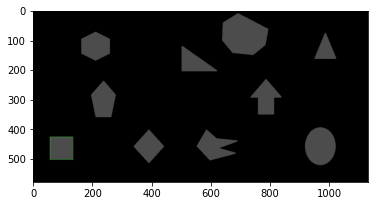

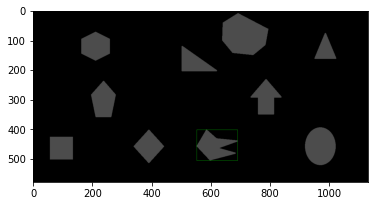

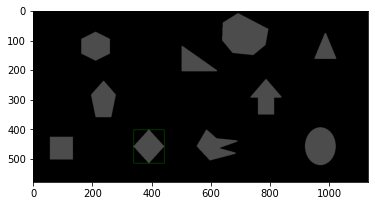

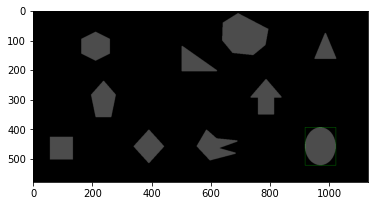

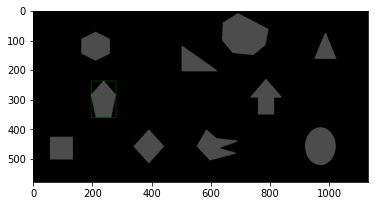

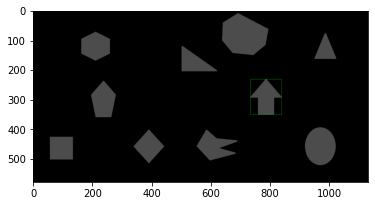

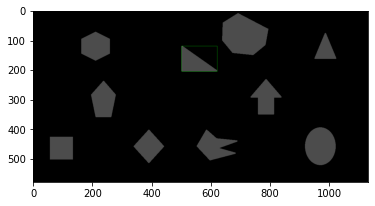

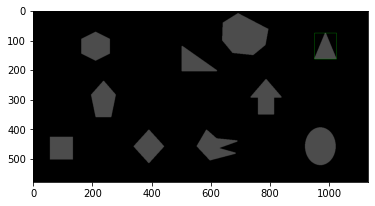

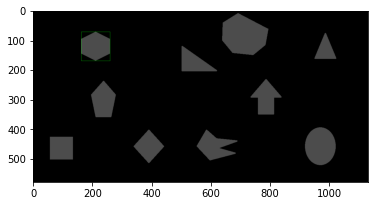

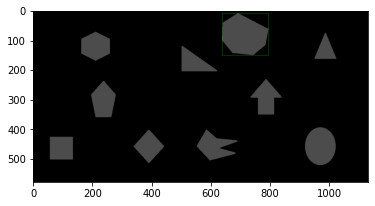

<Figure size 432x288 with 0 Axes>

In [ ]:
# read the image
og_img = cv.imread("binaryshapes.png",cv.IMREAD_GRAYSCALE)
# convert the image into a binary image
(thresh, binary_img) = cv.threshold(og_img, 100, 1, cv.THRESH_BINARY)

# get a copy of the image and draw contours on the copy
edged = binary_img.copy()
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# plot the required figures
nrows = 10
ncols = 1

# fig, ax = plt.subplots(nrows, ncols, figsize = (50, 10))

for row in range(nrows):

  for col in range(ncols):

    contour_no = row*ncols + col
    
    im = cv.cvtColor(binary_img, cv.COLOR_GRAY2RGB)
    
    # get the bounding Rectangle
    x,y,w,h = cv.boundingRect(contours[contour_no])
    
    # show all
    plt.imshow(cv.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1))
    plt.imshow(binary_img, cmap = "gray", alpha = 0.3)
    plt.show()

    
plt.suptitle("Bounding Box and Eccentricity(e) for all objects")
plt.show()

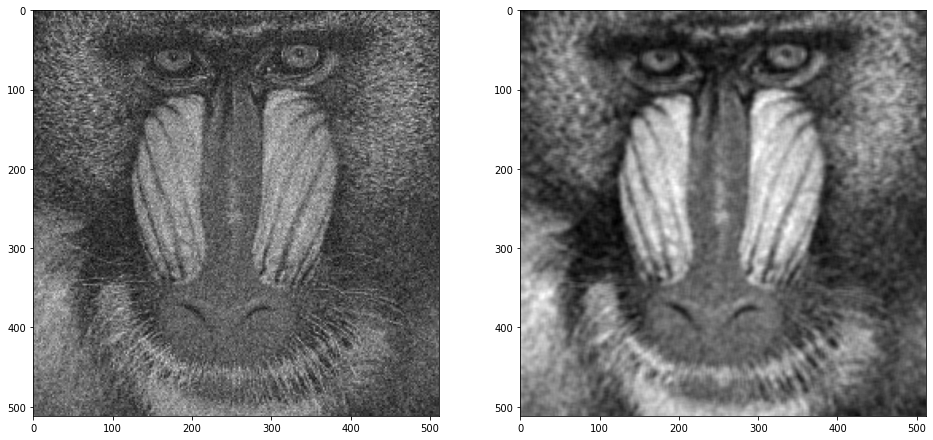

In [ ]:
# denoising the image
og_img = cv.imread("baboon.tiff",cv.IMREAD_GRAYSCALE)

I_gaussian_blur1 = cv.GaussianBlur(og_img,(7,7),10,cv.BORDER_DEFAULT)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

ax[0].imshow(og_img, cmap = "gray")
ax[1].imshow(I_gaussian_blur1, cmap = "gray")
plt.show()

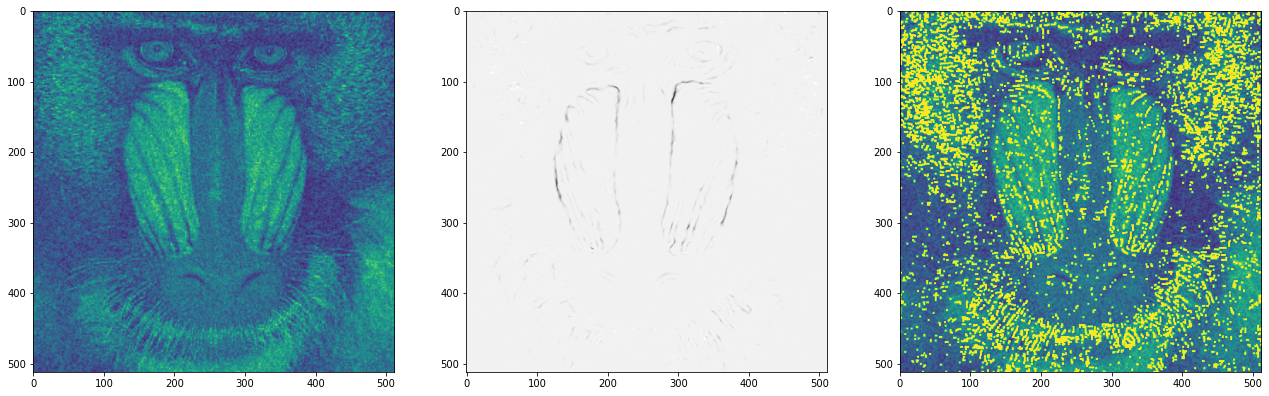

In [ ]:
# using harris corner detector to detect the corners
dst = cv.cornerHarris(I_gaussian_blur1,2,3,0.1)
dst = cv.dilate(dst, None)

marker_img = og_img.copy()
# having a threshold of 0.01
marker_img[dst > 0.01*np.max(dst)] = 255

# plotting the corners detected here
fig, ax = plt.subplots(1, 3, figsize = (22, 15))
ax[0].imshow(og_img[:,::-1])
ax[1].imshow(dst, cmap = "gray")
ax[2].imshow(marker_img[:,::-1])
plt.show()

In [ ]:
# finding the homography matrix
src_points = np.asarray([[5,4 ], [7,4], [7,5], [6,6]])
dt_points = np.asarray([[0,0], [1,0], [1,1], [0,1]])
h, t = cv.findHomography(src_points, dt_points)
h

array([[ 5.55555556e-02, -2.77777778e-02, -1.66666667e-01],
       [-2.36548096e-17,  8.33333333e-02, -3.33333333e-01],
       [-1.11111111e-01, -2.77777778e-02,  1.00000000e+00]])

In [ ]:
# finding the fundamental matrix
pts1 = np.asarray([[533.4, 140.2], [1047.3, 570.0], [2033.0, 491.8], [139.7, 1639.8], [1555.2,2021.5], [927.1,2869],[557.5,3346.8], [1991,3184.6]])
pts2 = np.asarray([[650.6,524.9], [1008.2, 795.4], [1849.7,1080.9],[235.9,1730], [1510.1, 2012.5], [933.1, 2784.9], [671.7,3169.5], [1858.7,2938.1]])
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
F

array([[ 6.48237893e-08, -2.20183415e-06,  4.06279701e-03],
       [ 2.13077969e-06,  4.94048081e-08, -4.57123910e-03],
       [-4.20171974e-03,  4.10494166e-03,  1.00000000e+00]])

In [ ]:
# matrix rank is 2, hence
f = [[-0.00310695, -0.0025646, 2.96584], [-0.028094, -0.00771621, 56.3813], [13.1905, -29.2007, -9999.79]]
np.linalg.matrix_rank(f)

3

In [ ]:
# since matrix rank is not 3, we compute the epipolar line on the given point
x_p = [343.53, 221.70, 1]
u, d, v = np.linalg.svd(f)
f = u * np.diag([d[0], d[1], 0]) * v.T
np.linalg.matrix_rank(f)
f

In [ ]:
a, b = np.linalg.qr(np.asarray([[0.7679, -0.4938, -0.0234, 0.0067], [-0.0852, -0.0915, -0.9065, -0.0878], [0.1827, 0.2988, -0.0742, 1]]))